# Diplomatura en ciencia de datos, aprendizaje automático y sus aplicaciones - Edición 2023 - FAMAF (UNC)

## Mentoría 16 - ¿Cómo identificar fuga de ventas? Inteligencia artificial aplicada al sector comercial.

### Explorando Patrones de Datos a través de Clustering (TP3) - Parte 2: Análisis e imputación de NaNs

**Integrantes:**
- Canalis, Patricio.
- Chevallier-Boutell, Ignacio José.
- Villarroel Torrez, Daniel.

**Mentores:**
- Gonzalez, Lucía
- Lahoz, Nahuel

---
## Librerías y dataset

In [2]:
# Funciones propias
from tp3_utils_cluster import *
%load_ext autoreload
%autoreload 2

# Visualización y curación
import pandas as pd
import json
from os.path import exists
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Clustering
from sklearn import manifold, preprocessing, decomposition
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.cluster import KMeans, MeanShift
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# Preferencias
pd.reset_option('^display\.float_format')
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows',150)
plt.rcdefaults()
sns.set_context('talk')
sns.set_theme(style='white')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
data = pd.read_csv('../data/interim/tp3_pivot_DecisionTirar-10sr.csv')

# Probar distintas especificaciones

In [4]:
basics = ['ID', 'Subrubro', 'Modelo']
F_Com = ['F_pct_Com_1905', 'F_pct_Com_1906', 'F_pct_Com_1907', 'F_pct_Com_1908', 
        'F_pct_Com_1909', 'F_pct_Com_1910', 'F_pct_Com_1911', 'F_pct_Com_1912',
        'F_pct_Com_2001', 'F_pct_Com_2002', 'F_pct_Com_2003', 'F_pct_Com_2004',
        'F_pct_Com_2005', 'F_pct_Com_2006', 'F_pct_Com_2007', 'F_pct_Com_2008',
        'F_pct_Com_2009', 'F_pct_Com_2010', 'F_pct_Com_2011', 'F_pct_Com_2012',
        'F_pct_Com_2101', 'F_pct_Com_2102', 'F_pct_Com_2103', 'F_pct_Com_2104',
        'F_pct_Com_2105', 'F_pct_Com_2106', 'F_pct_Com_2107', 'F_pct_Com_2108',
        'F_pct_Com_2109', 'F_pct_Com_2110', 'F_pct_Com_2111', 'F_pct_Com_2112',
        'F_pct_Com_2201', 'F_pct_Com_2202', 'F_pct_Com_2203', 'F_pct_Com_2204',
        'F_pct_Com_2205', 'F_pct_Com_2206']
F_Ven = ['F_pct_Ven_1905', 'F_pct_Ven_1906', 'F_pct_Ven_1907', 'F_pct_Ven_1908', 
        'F_pct_Ven_1909', 'F_pct_Ven_1910', 'F_pct_Ven_1911', 'F_pct_Ven_1912',
        'F_pct_Ven_2001', 'F_pct_Ven_2002', 'F_pct_Ven_2003', 'F_pct_Ven_2004',
        'F_pct_Ven_2005', 'F_pct_Ven_2006', 'F_pct_Ven_2007', 'F_pct_Ven_2008',
        'F_pct_Ven_2009', 'F_pct_Ven_2010', 'F_pct_Ven_2011', 'F_pct_Ven_2012',
        'F_pct_Ven_2101', 'F_pct_Ven_2102', 'F_pct_Ven_2103', 'F_pct_Ven_2104',
        'F_pct_Ven_2105', 'F_pct_Ven_2106', 'F_pct_Ven_2107', 'F_pct_Ven_2108',
        'F_pct_Ven_2109', 'F_pct_Ven_2110', 'F_pct_Ven_2111', 'F_pct_Ven_2112',
        'F_pct_Ven_2201', 'F_pct_Ven_2202', 'F_pct_Ven_2203', 'F_pct_Ven_2204',
        'F_pct_Ven_2205', 'F_pct_Ven_2206']
Y_Com = ['Y_pct_Com_2001', 'Y_pct_Com_2002', 'Y_pct_Com_2003', 'Y_pct_Com_2004',
        'Y_pct_Com_2005', 'Y_pct_Com_2006', 'Y_pct_Com_2007', 'Y_pct_Com_2008',
        'Y_pct_Com_2009', 'Y_pct_Com_2010', 'Y_pct_Com_2011', 'Y_pct_Com_2012',
        'Y_pct_Com_2101', 'Y_pct_Com_2102', 'Y_pct_Com_2103', 'Y_pct_Com_2104',
        'Y_pct_Com_2105', 'Y_pct_Com_2106', 'Y_pct_Com_2107', 'Y_pct_Com_2108',
        'Y_pct_Com_2109', 'Y_pct_Com_2110', 'Y_pct_Com_2111', 'Y_pct_Com_2112',
        'Y_pct_Com_2201', 'Y_pct_Com_2202', 'Y_pct_Com_2203', 'Y_pct_Com_2204',
        'Y_pct_Com_2205', 'Y_pct_Com_2206']
Y_Ven = ['Y_pct_Ven_2001', 'Y_pct_Ven_2002', 'Y_pct_Ven_2003', 'Y_pct_Ven_2004',
        'Y_pct_Ven_2005', 'Y_pct_Ven_2006', 'Y_pct_Ven_2007', 'Y_pct_Ven_2008',
        'Y_pct_Ven_2009', 'Y_pct_Ven_2010', 'Y_pct_Ven_2011', 'Y_pct_Ven_2012',
        'Y_pct_Ven_2101', 'Y_pct_Ven_2102', 'Y_pct_Ven_2103', 'Y_pct_Ven_2104',
        'Y_pct_Ven_2105', 'Y_pct_Ven_2106', 'Y_pct_Ven_2107', 'Y_pct_Ven_2108',
        'Y_pct_Ven_2109', 'Y_pct_Ven_2110', 'Y_pct_Ven_2111', 'Y_pct_Ven_2112',
        'Y_pct_Ven_2201', 'Y_pct_Ven_2202', 'Y_pct_Ven_2203', 'Y_pct_Ven_2204',
        'Y_pct_Ven_2205', 'Y_pct_Ven_2206']

In [33]:
def clusterizar_y_graficar(data, grupos, imputar, escalar, reducir, clusterizar, zoom):

    for subrubro in data['Subrubro'].unique():

        # Grupo de variables a considerar
        basics = ['ID', 'Subrubro', 'Modelo']
        F_Com = ['F_pct_Com_1905', 'F_pct_Com_1906', 'F_pct_Com_1907', 'F_pct_Com_1908', 
                'F_pct_Com_1909', 'F_pct_Com_1910', 'F_pct_Com_1911', 'F_pct_Com_1912',
                'F_pct_Com_2001', 'F_pct_Com_2002', 'F_pct_Com_2003', 'F_pct_Com_2004',
                'F_pct_Com_2005', 'F_pct_Com_2006', 'F_pct_Com_2007', 'F_pct_Com_2008',
                'F_pct_Com_2009', 'F_pct_Com_2010', 'F_pct_Com_2011', 'F_pct_Com_2012',
                'F_pct_Com_2101', 'F_pct_Com_2102', 'F_pct_Com_2103', 'F_pct_Com_2104',
                'F_pct_Com_2105', 'F_pct_Com_2106', 'F_pct_Com_2107', 'F_pct_Com_2108',
                'F_pct_Com_2109', 'F_pct_Com_2110', 'F_pct_Com_2111', 'F_pct_Com_2112',
                'F_pct_Com_2201', 'F_pct_Com_2202', 'F_pct_Com_2203', 'F_pct_Com_2204',
                'F_pct_Com_2205', 'F_pct_Com_2206']
        F_Ven = ['F_pct_Ven_1905', 'F_pct_Ven_1906', 'F_pct_Ven_1907', 'F_pct_Ven_1908', 
                'F_pct_Ven_1909', 'F_pct_Ven_1910', 'F_pct_Ven_1911', 'F_pct_Ven_1912',
                'F_pct_Ven_2001', 'F_pct_Ven_2002', 'F_pct_Ven_2003', 'F_pct_Ven_2004',
                'F_pct_Ven_2005', 'F_pct_Ven_2006', 'F_pct_Ven_2007', 'F_pct_Ven_2008',
                'F_pct_Ven_2009', 'F_pct_Ven_2010', 'F_pct_Ven_2011', 'F_pct_Ven_2012',
                'F_pct_Ven_2101', 'F_pct_Ven_2102', 'F_pct_Ven_2103', 'F_pct_Ven_2104',
                'F_pct_Ven_2105', 'F_pct_Ven_2106', 'F_pct_Ven_2107', 'F_pct_Ven_2108',
                'F_pct_Ven_2109', 'F_pct_Ven_2110', 'F_pct_Ven_2111', 'F_pct_Ven_2112',
                'F_pct_Ven_2201', 'F_pct_Ven_2202', 'F_pct_Ven_2203', 'F_pct_Ven_2204',
                'F_pct_Ven_2205', 'F_pct_Ven_2206']
        Y_Com = ['Y_pct_Com_2001', 'Y_pct_Com_2002', 'Y_pct_Com_2003', 'Y_pct_Com_2004',
                'Y_pct_Com_2005', 'Y_pct_Com_2006', 'Y_pct_Com_2007', 'Y_pct_Com_2008',
                'Y_pct_Com_2009', 'Y_pct_Com_2010', 'Y_pct_Com_2011', 'Y_pct_Com_2012',
                'Y_pct_Com_2101', 'Y_pct_Com_2102', 'Y_pct_Com_2103', 'Y_pct_Com_2104',
                'Y_pct_Com_2105', 'Y_pct_Com_2106', 'Y_pct_Com_2107', 'Y_pct_Com_2108',
                'Y_pct_Com_2109', 'Y_pct_Com_2110', 'Y_pct_Com_2111', 'Y_pct_Com_2112',
                'Y_pct_Com_2201', 'Y_pct_Com_2202', 'Y_pct_Com_2203', 'Y_pct_Com_2204',
                'Y_pct_Com_2205', 'Y_pct_Com_2206']
        Y_Ven = ['Y_pct_Ven_2001', 'Y_pct_Ven_2002', 'Y_pct_Ven_2003', 'Y_pct_Ven_2004',
                'Y_pct_Ven_2005', 'Y_pct_Ven_2006', 'Y_pct_Ven_2007', 'Y_pct_Ven_2008',
                'Y_pct_Ven_2009', 'Y_pct_Ven_2010', 'Y_pct_Ven_2011', 'Y_pct_Ven_2012',
                'Y_pct_Ven_2101', 'Y_pct_Ven_2102', 'Y_pct_Ven_2103', 'Y_pct_Ven_2104',
                'Y_pct_Ven_2105', 'Y_pct_Ven_2106', 'Y_pct_Ven_2107', 'Y_pct_Ven_2108',
                'Y_pct_Ven_2109', 'Y_pct_Ven_2110', 'Y_pct_Ven_2111', 'Y_pct_Ven_2112',
                'Y_pct_Ven_2201', 'Y_pct_Ven_2202', 'Y_pct_Ven_2203', 'Y_pct_Ven_2204',
                'Y_pct_Ven_2205', 'Y_pct_Ven_2206']
        vectores = data[basics+grupos].copy()
        categ = vectores[vectores['Subrubro'] == subrubro].iloc[:, :3].copy()
        categ.reset_index(inplace=True)
        numeric = vectores[vectores['Subrubro'] == subrubro].iloc[:, 3:].copy()

        # Imputar faltantes
        if imputar == 'KNN':
                imputer = KNNImputer()
                intermedio_arr = imputer.fit_transform(numeric)
                intermedio = pd.DataFrame(intermedio_arr, columns=numeric.columns)
        elif imputar == 'Ceros':
                intermedio = numeric.fillna(0).copy()
        elif imputar == 'Promedio columnas':
                intermedio = numeric.fillna(numeric.mean()).copy()
        elif imputar == 'Promedio filas':
                f = numeric.copy()
                f = f.T
                f = f.fillna(f.mean()).copy()
                intermedio = f.T
        else: print('Error: falta elegir método de imputación (argumento imputar)')

        # Escalar
        if escalar == 'MinMax':
                scaler = MinMaxScaler()
                intermedio = scaler.fit_transform(intermedio)
        elif escalar == 'Standard':
                scaler = StandardScaler()
                intermedio = scaler.fit_transform(intermedio)
        else: print('Error: falta elegir escalado (argumento escalar)')

        # PCA
        maximo = min(intermedio.shape[0], intermedio.shape[1])
        if reducir >= maximo:
                pca = decomposition.PCA(n_components=maximo)
                pca.fit(intermedio)
                subrubro_df_pca = pca.transform(intermedio)
                subrubro_df_pca = pd.DataFrame(data=subrubro_df_pca, columns=[f'PC{i}' for i in range(1, maximo+1)]).copy()
        elif reducir < maximo:
                pca = decomposition.PCA(n_components=reducir)
                pca.fit(intermedio)
                subrubro_df_pca = pca.transform(intermedio)
                subrubro_df_pca = pd.DataFrame(data=subrubro_df_pca, columns=[f'PC{i}' for i in range(1, reducir+1)]).copy()
        else: print('Error: falta elegir cantidad de componentes del PCA (argumento reducir)')

        # Clustering
        if clusterizar == 'DBSCAN':
                cl = custom
                cl.fit(subrubro_df_pca)
                clusters = cl.labels_
        elif clusterizar == 'KNN':
                cl = custom
                cl.fit(subrubro_df_pca)
                centroid = np.mean(subrubro_df_pca, axis=0)
                distances, indices = cl.kneighbors([centroid])
                indices = np.array(indices).flatten()
        else: print('Error: falta elegir método de clustering (argumento clusterizar)')

        # PCA de 2 componentes para visualizar
        pca = decomposition.PCA(n_components=2)
        pca.fit(subrubro_df_pca)
        subrubro_df_pca_2 = pca.transform(subrubro_df_pca)  # numpy array
        subrubro_df_pca_2 = pd.DataFrame(data=subrubro_df_pca_2, columns=[f'PC{i}' for i in range(1, 3)]).copy()
        subrubro_df_clusters = subrubro_df_pca_2.copy()
        if clusterizar == 'DBSCAN':
                subrubro_df_clusters['cl_n'] = cl.labels_
        elif clusterizar == 'KNN':
                subrubro_df_clusters['cl_n'] = 0
                subrubro_df_clusters.loc[subrubro_df_clusters.index.isin(indices), 'cl_n'] = 1
        else: print('Error: falta elegir método de clustering (argumento clusterizar)')
        subrubro_df_clusters = pd.concat([categ, subrubro_df_clusters], axis=1)
        # Gráfico

        grupo_variables = {}
        for value in subrubro_df_clusters["cl_n"].unique():
                variable_name = f"grupo_{value}"
                grupo_variables[variable_name] = len(subrubro_df_clusters[(subrubro_df_clusters["cl_n"] == value) & (subrubro_df_clusters['Modelo'] == 1)])
        max_value = max(grupo_variables.values())
        max_key = max(grupo_variables, key=lambda k: grupo_variables[k])
        max_key = max_key.replace("grupo_", "")
        model = len(subrubro_df_clusters[subrubro_df_clusters['Modelo'] == 1])  
        acierto = f'{round(max_value/model*100)}%'

        fig, axs = plt.subplots(1, 2, figsize=(10.8, 4.8))
        fig.suptitle(f"Subrubro: {subrubro}", fontsize=16)
        axs[0].set_title("Vista normal")
        axs[1].set_title("Zoom en (0, 0)")
        for ax in axs:
                sns.scatterplot(data=subrubro_df_clusters, x='PC1', y='PC2', hue='cl_n', palette='Set1', s=20, ax=ax)
        filt_modelo_1 = subrubro_df_clusters['Modelo'] == 1
        modclus = len(subrubro_df_clusters[filt_modelo_1]["Subrubro"])
        for ax in axs:
                sns.scatterplot(data=subrubro_df_clusters[filt_modelo_1], x='PC1', y='PC2', color='black', s=100, label=f'Modelo: \n {modclus} \n({acierto} en {max_key})', ax=ax, marker='*')
        axs[1].set_xlim(-zoom, zoom)
        axs[1].set_ylim(-zoom, zoom)
        for ax in axs:
                ax.get_legend().remove()
        handles, labels = axs[1].get_legend_handles_labels()
        fig.legend(handles, labels, loc="upper left", bbox_to_anchor=(1, 1))
        plt.tight_layout()
        plt.show()

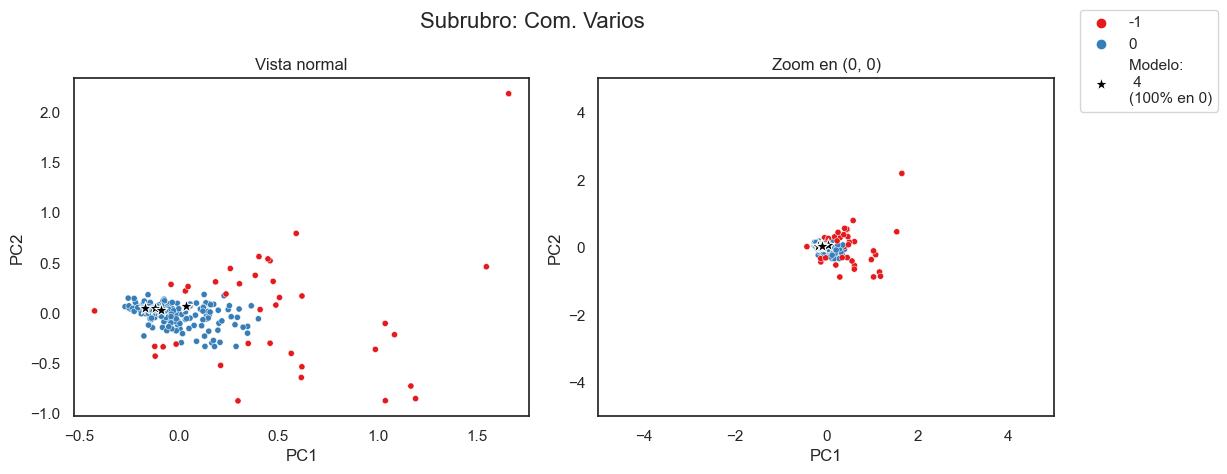

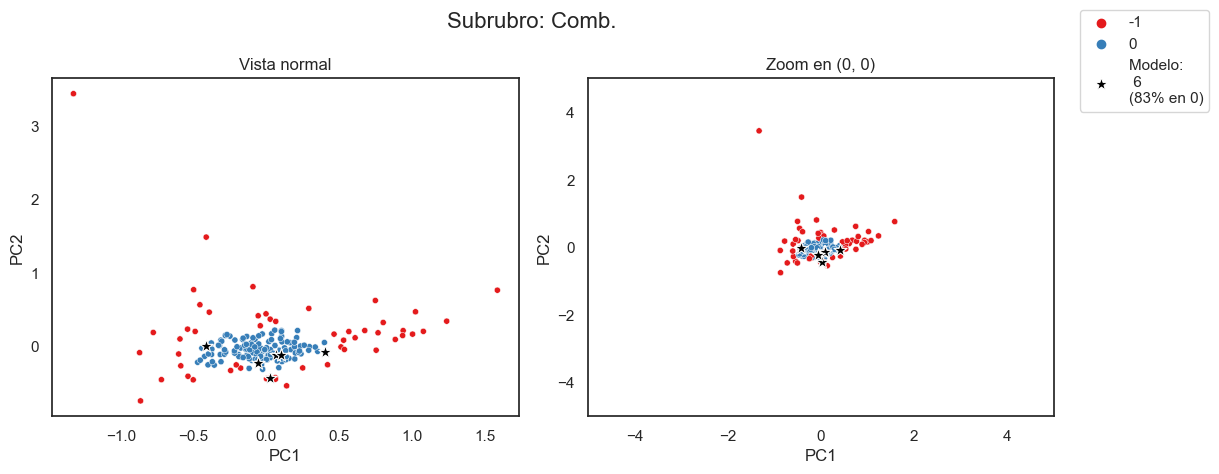

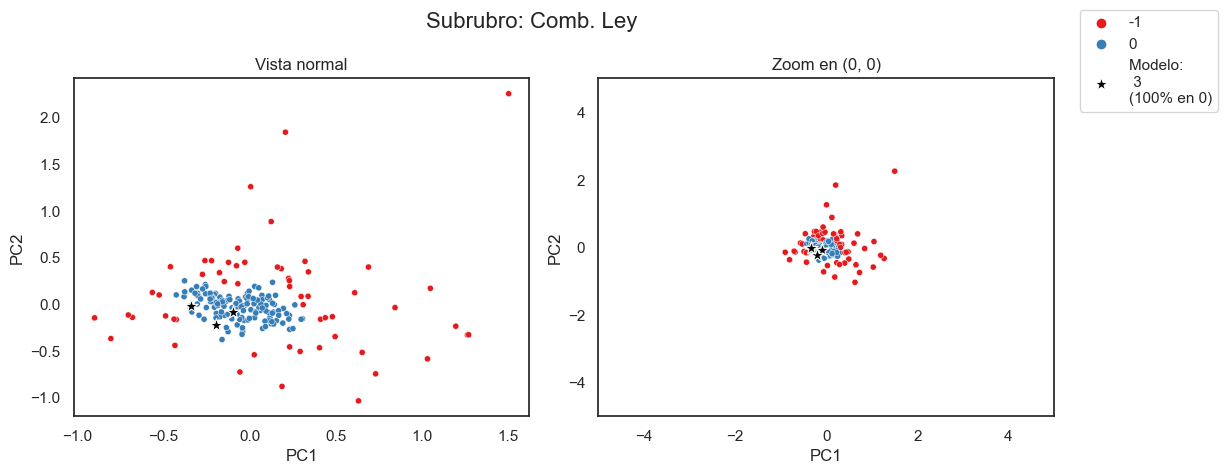

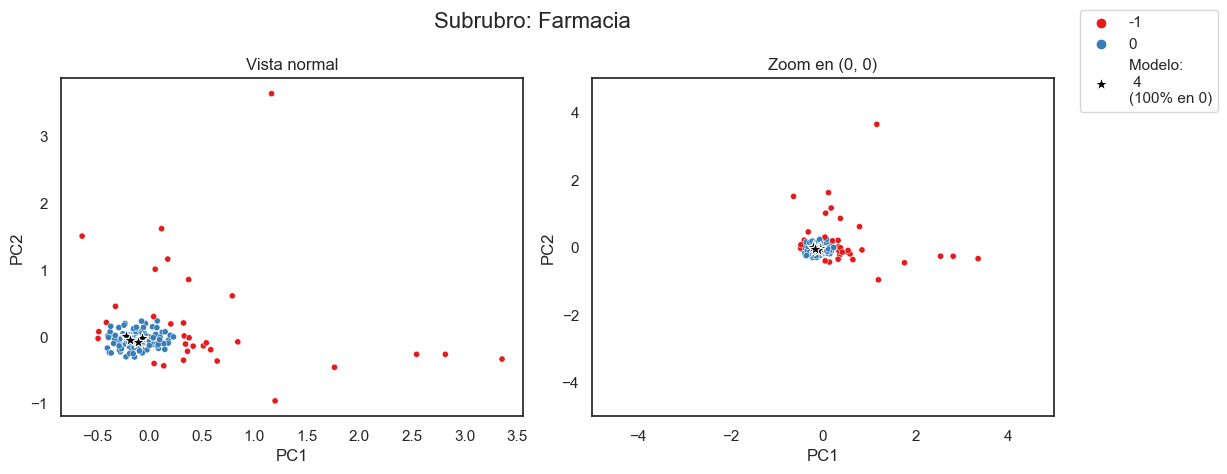

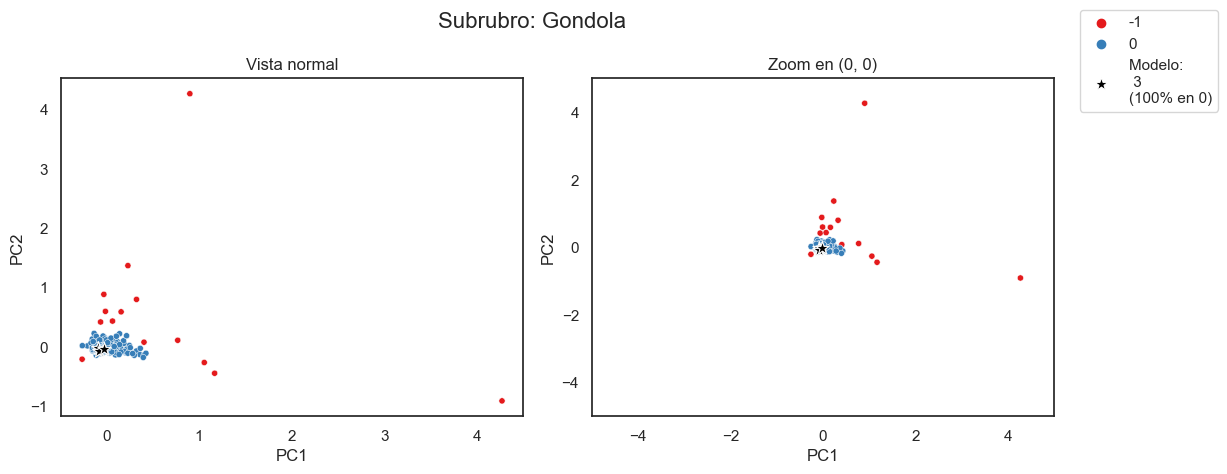

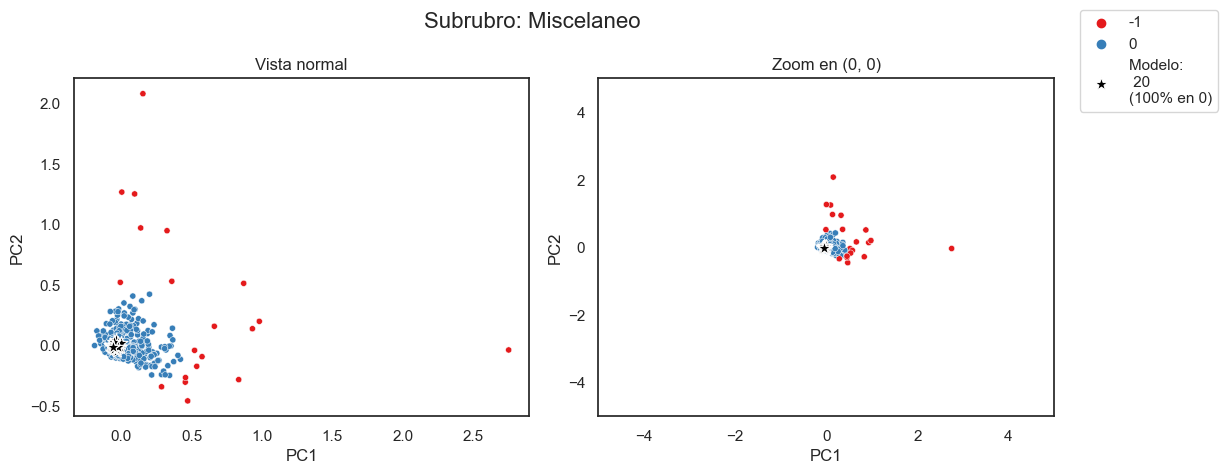

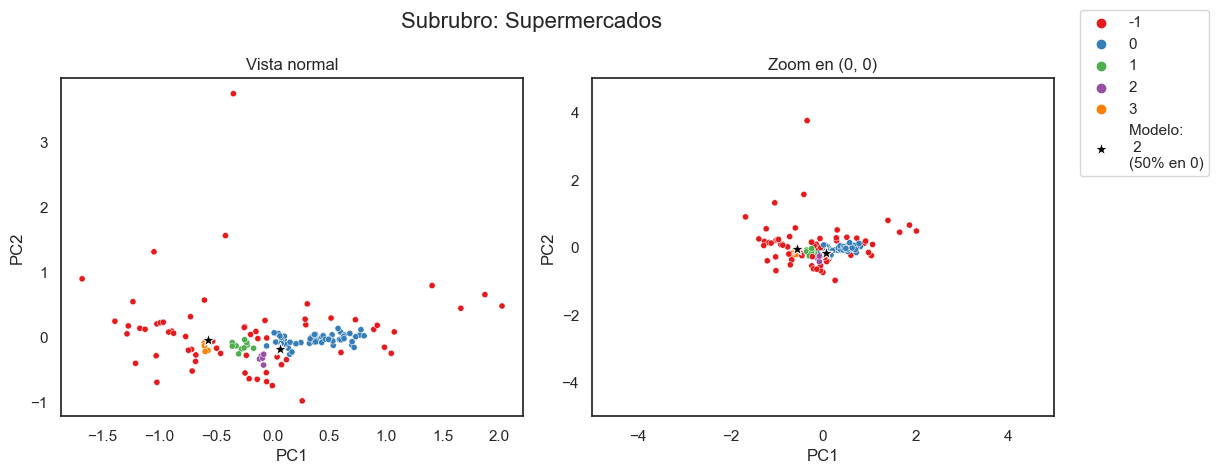

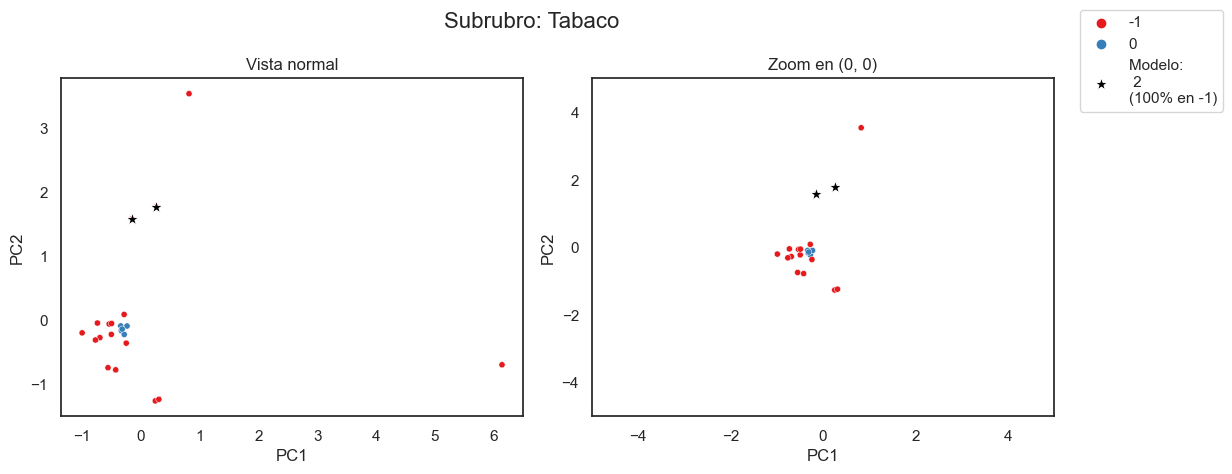

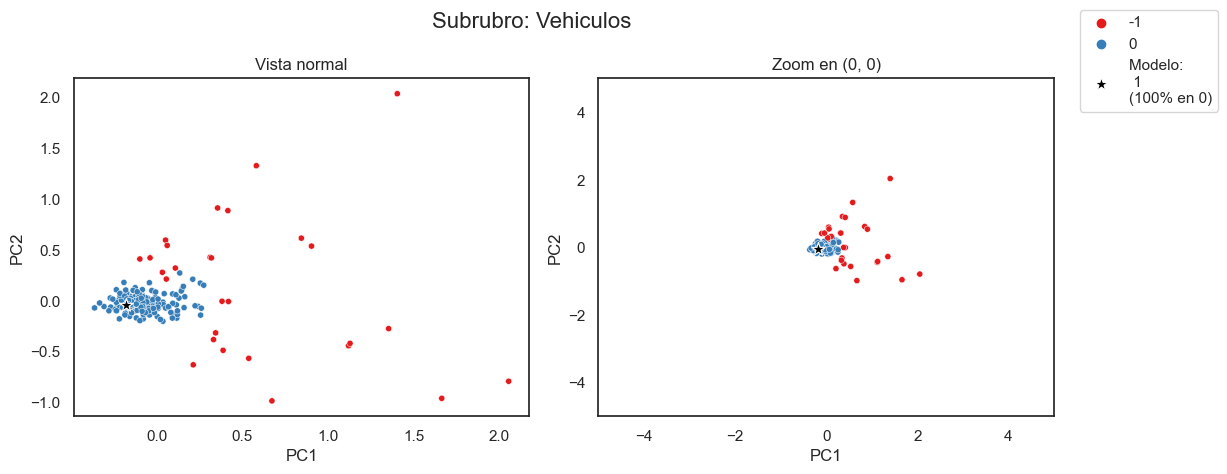

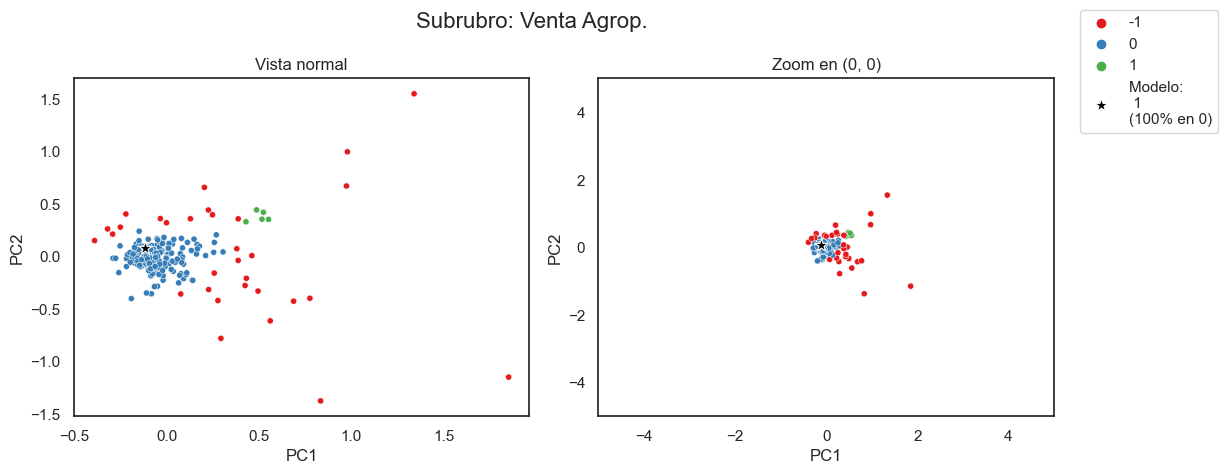

In [37]:
custom = DBSCAN(eps=0.1, min_samples=5)
#custom = NearestNeighbors(n_neighbors=1000, radius = 1, metric='l1')

clusterizar_y_graficar(data = data,
                       grupos = Y_Ven+Y_Com+F_Ven+F_Com, 
                       imputar = 'Ceros',
                       escalar = 'MinMax', 
                       reducir = 2,
                       clusterizar = 'DBSCAN',
                       zoom = 5)